# GEO3463: CTD data processing code for SAMS field trip Day 1 (14/05/24)
This Jupyter program is used to read and plot the CTD data, including, 
1. CTD profile data
2. CTD bottle data

Variables and definations in CTD
- Scan: Scan Count [dimensionless]
- DepSM: Depth [m]
- prDM: Pressure, Digiquartz [db]
- Tv290C: Temperature [deg C]
- C0mS/cm: Conductivity [mS/cm]
- WetStar: fluorescence [mg/m3] 
- Par: PAR [uE/m2/s] 
- Sbeox0Mm/L: Oxygen [umol/L]
- Sbeox0PS: O2 saturation [%] 
- DepSM2: Depth [m]
- Sal00: Salinity [PSU]
- Sigma-È00: Density [kg/m3]
- SvCM: Sound Velocity [m/s]

### Load function needed for the program

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

### Supress warnings (prevents Jupyter printing out warnings....do be careful with this)

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Define column names of CTD and bottle file

In [3]:
# define column names manually，since column headers of PAR and Fluorescence of the ascii file are printed without spacing, which confuses the read function
column_name_profile = ['Scan','DD','MMM','YYYY','HH:MM:SS','PrdM','Tv290C','C0mS/cm','WetStar','Par','Sbeox0Mm/L','Sbeox0PS','DepSM','Sal00','Sigma-È00','SvCM','Flag']
#column_name_profile = ['Scan','DD','MMM','YYYY','HH:MM:SS','PrdM','Tv290C','C0mS/cm','WetStar','FlECO-AFLPar/sat/log','Sbeox0Mm/L','Sbeox0PS','DepSM','Sal00','Sigma-È00','SvCM','Flag']
column_name_bottle = ['Bottle','Date','Sal00','Sigma-È00','Scan','TimeJ','PrdM','Tv290C','C0mS/cm','WetStar','Par','Sbeox0Mm/L','Note'] 



### Read in the CTD data RE05 Cast 1

In [6]:
# read profile data
#file_name_profile = '2024-05-14/sbe19p_5262_20240514_re5_1m.asc'
file_name_profile = 'CTD_data_2024/sbe19p_5262_20240514_re5_1m.asc'
data_profile = pd.read_fwf(file_name_profile, 
                           header=None, 
                           skiprows=1, 
                           names=column_name_profile, 
                           index_col='DepSM',
                           encoding = 'ISO-8859-1',
                           parse_dates={'Time':['YYYY','MMM','DD','HH:MM:SS']}
                          )
# the CTD file contains both upcast and downcast
# to read/plot data individually, seperate two casts by adding a column, titled 'cast_diff'
data_profile['cast_diff'] = data_profile['PrdM'].diff()
data_profile['cast_diff'][0] = 1

In [7]:
data_profile['cast_diff'][data_profile['cast_diff']>=1]=1.
data_profile['cast_diff'][data_profile['cast_diff']<=-1]=-1.

print(data_profile['cast_diff'])

DepSM
0.991    NaN
1.982    1.0
2.973    1.0
3.964    1.0
4.954    1.0
        ... 
4.954   -1.0
3.964   -1.0
2.973   -1.0
1.982   -1.0
0.991   -1.0
Name: cast_diff, Length: 279, dtype: float64


### Read in the Bottle data RE05 Cast 1

In [9]:
# read bottle data
#file_name_bottle = '2024-05-14/sbe19p_5262_20240514_re5.btl'
file_name_bottle = 'CTD_data_2024/sbe19p_5262_20240514_re5.btl'
data_bottle = pd.read_fwf(file_name_bottle, 
                          header=None, 
                          skiprows=162,
                          names=column_name_bottle,
                          encoding='latin-1')


# select the average and std
data_bottle_average = data_bottle[data_bottle['Note']=='(avg)'].reset_index(drop=True)
data_bottle_std = data_bottle[data_bottle['Note']=='(sdev)'].reset_index(drop=True)

### Plot bottle data onto CTD data RE05 Cast 1

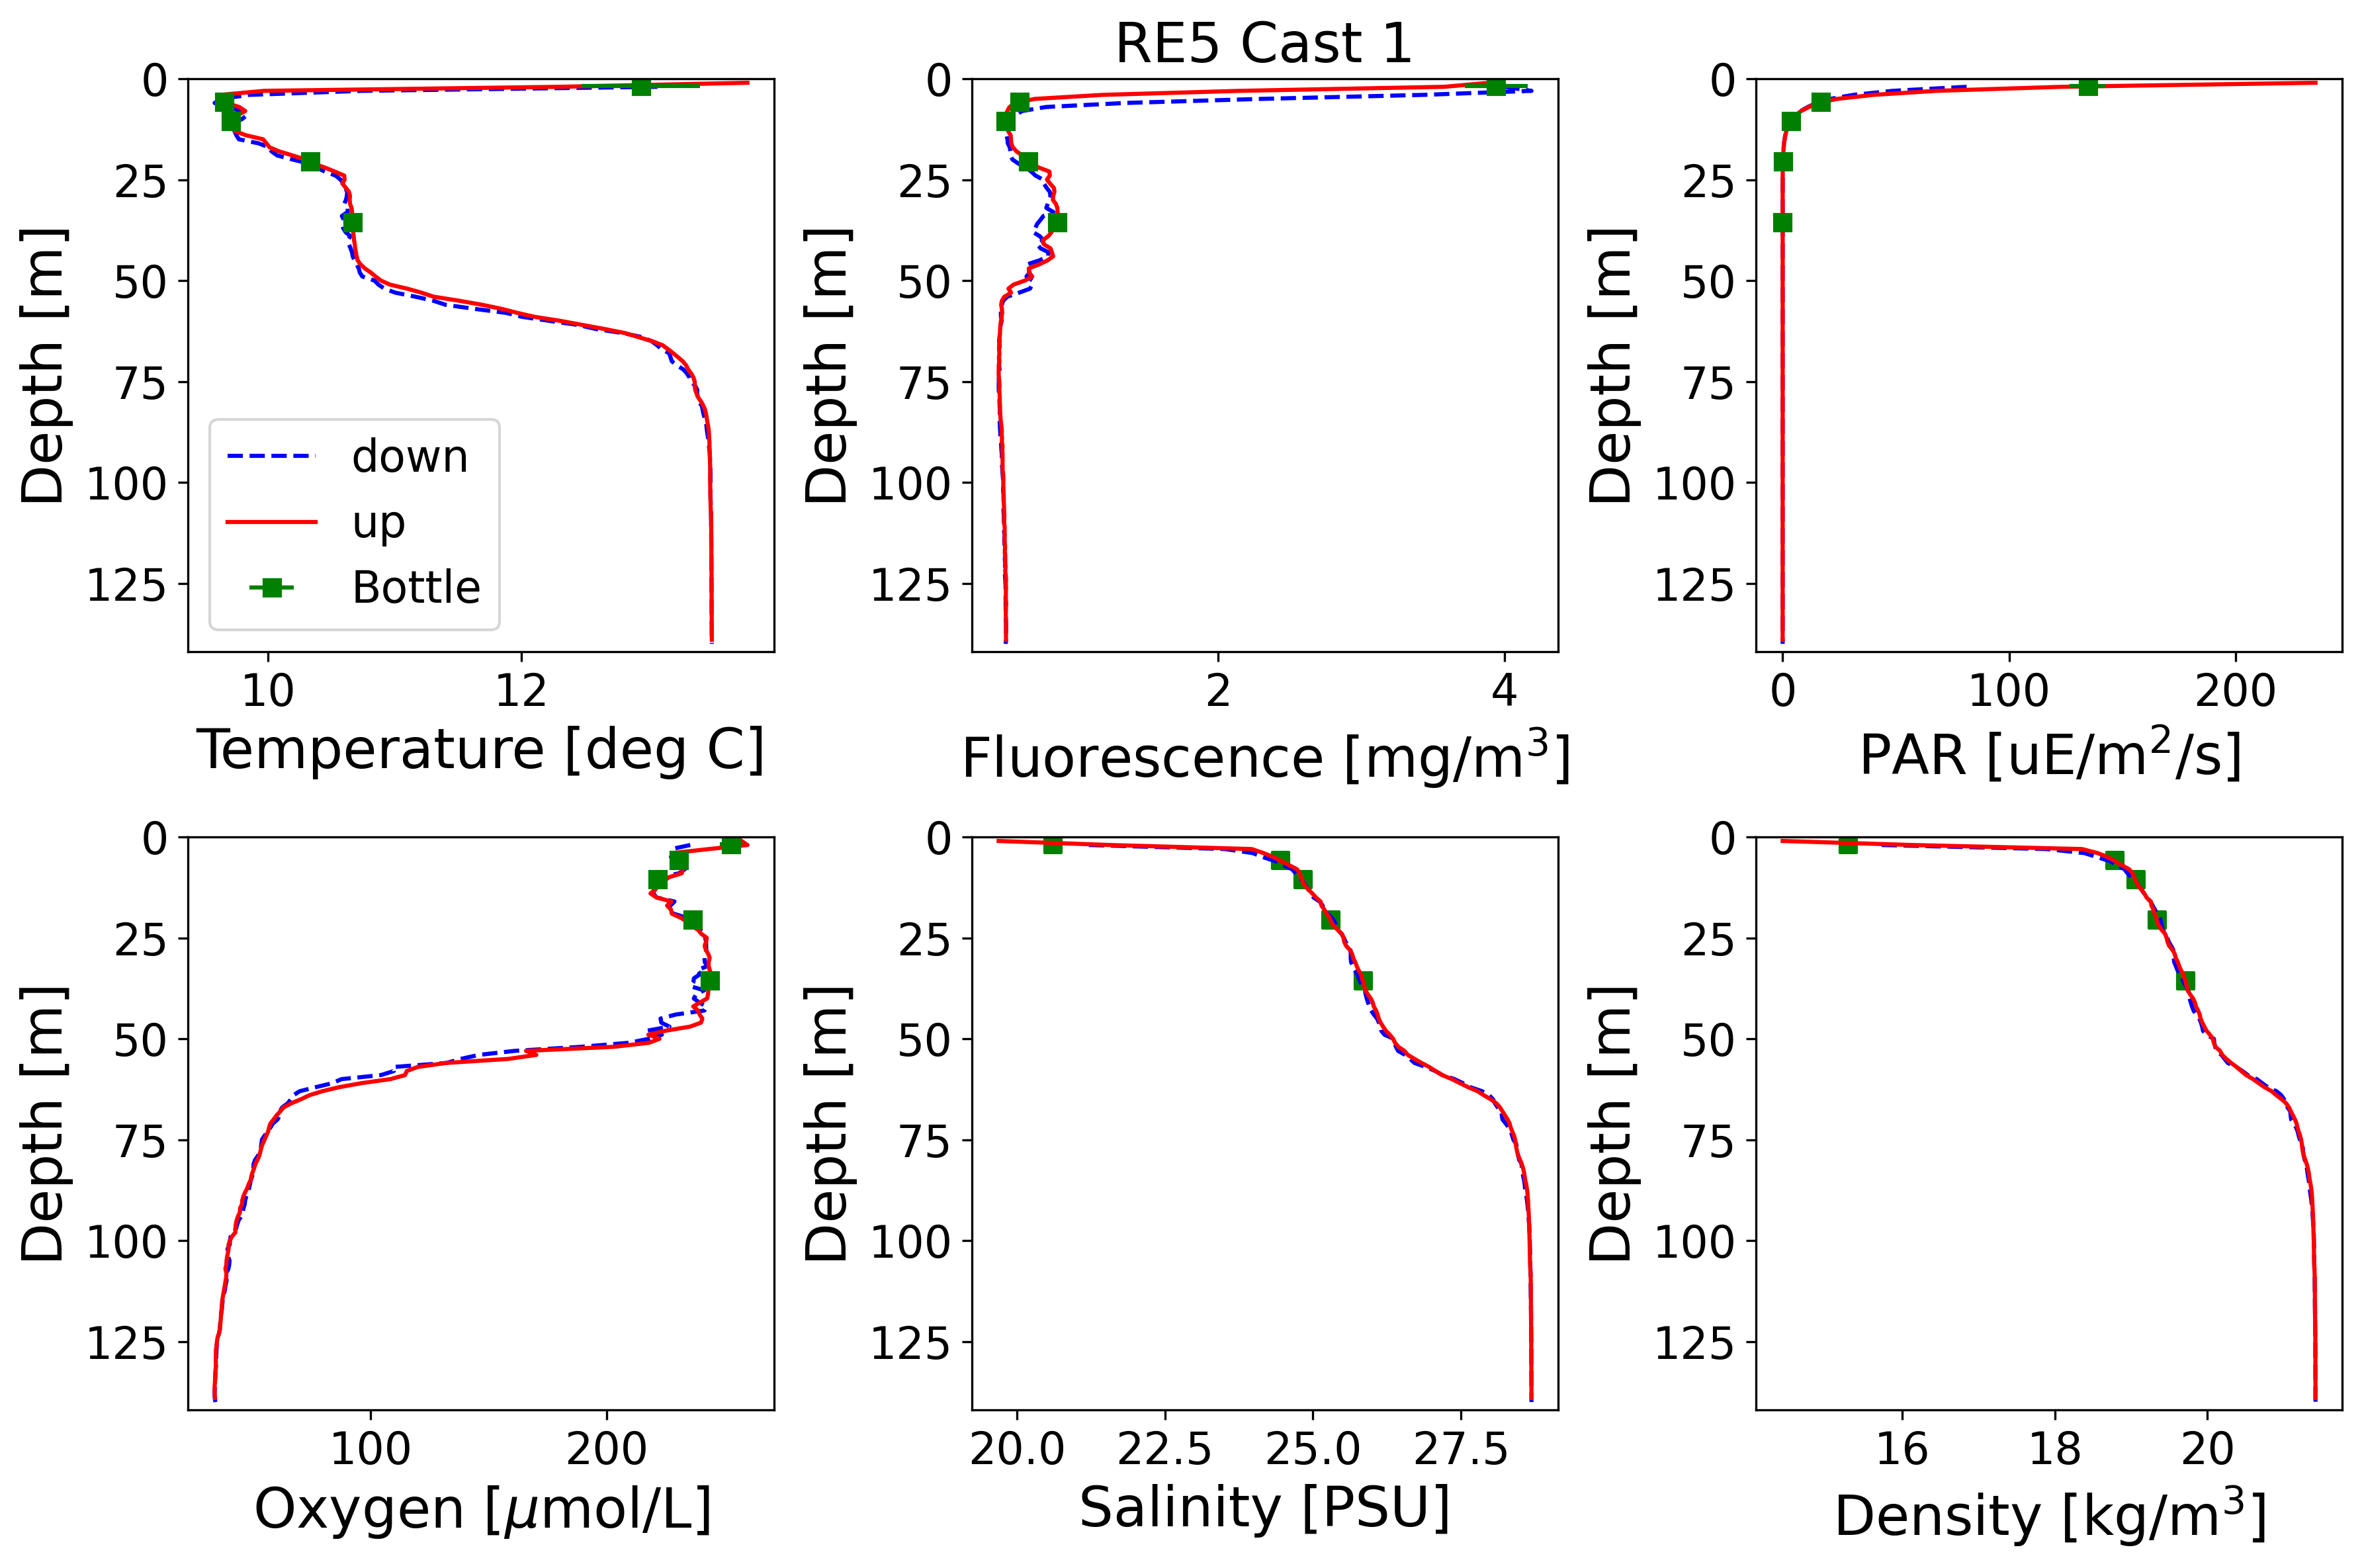

In [10]:
# plot both profile and bottle data
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8),dpi=300)

# temperature
axes[0,0].plot(data_profile[(data_profile['cast_diff']==1)]['Tv290C'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[0,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Tv290C'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[0,0].errorbar(data_bottle_average['Tv290C'],data_bottle_average['PrdM'],xerr=data_bottle_std['Tv290C'],marker='s',color='green',ls='None',label='Bottle')
axes[0,0].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel('Temperature [deg C]', fontsize = 20)
axes[0,0].set_ylabel('Depth [m]', fontsize = 20)
axes[0,0].xaxis.set_tick_params(labelsize=16)
axes[0,0].yaxis.set_tick_params(labelsize=16)
axes[0,0].legend(fontsize = 16)   

# fluorescence
axes[0,1].plot(data_profile[(data_profile['cast_diff']==1)]['WetStar'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[0,1].plot(data_profile[(data_profile['cast_diff']==-1)]['WetStar'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[0,1].errorbar(data_bottle_average['WetStar'],data_bottle_average['PrdM'],xerr=data_bottle_std['WetStar'],marker='s',color='green',ls='None',label='Bottle')
axes[0,1].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel('Fluorescence [mg/m$^3$]', fontsize = 20)
axes[0,1].set_ylabel('Depth [m]', fontsize = 20)
axes[0,1].set_title('RE5 Cast 1', fontsize = 20)
axes[0,1].xaxis.set_tick_params(labelsize=16)
axes[0,1].yaxis.set_tick_params(labelsize=16)
# axes[0,1].legend(fontsize = 16)   

# PAR
axes[0,2].plot(data_profile[(data_profile['cast_diff']==1)]['Par'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[0,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Par'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[0,2].errorbar(data_bottle_average['Par'],data_bottle_average['PrdM'],xerr=data_bottle_std['Par'],marker='s',color='green',ls='None',label='Bottle')
axes[0,2].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[0,2].invert_yaxis()
axes[0,2].set_xlabel('PAR [uE/m$^2$/s]', fontsize = 20)
axes[0,2].set_ylabel('Depth [m]', fontsize = 20)
axes[0,2].xaxis.set_tick_params(labelsize=16)
axes[0,2].yaxis.set_tick_params(labelsize=16)
# axes[0,2].legend(fontsize = 16)   

# Oxygen
axes[1,0].plot(data_profile[(data_profile['cast_diff']==1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[1,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[1,0].errorbar(data_bottle_average['Sbeox0Mm/L'],data_bottle_average['PrdM'],xerr=data_bottle_std['Sbeox0Mm/L'],marker='s',color='green',ls='None',label='Bottle')
axes[1,0].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel('Oxygen [$\mu$mol/L]', fontsize = 20)
axes[1,0].set_ylabel('Depth [m]', fontsize = 20)
axes[1,0].xaxis.set_tick_params(labelsize=16)
axes[1,0].yaxis.set_tick_params(labelsize=16)
# axes[1,0].legend(fontsize = 16)    

# Salinity
axes[1,1].plot(data_profile[(data_profile['cast_diff']==1)]['Sal00'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[1,1].plot(data_profile[(data_profile['cast_diff']==-1)]['Sal00'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[1,1].scatter(data_bottle_average['Sal00'],data_bottle_average['PrdM'],marker='s',color='green',label='Bottle')
axes[1,1].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Salinity [PSU]', fontsize = 20)
axes[1,1].set_ylabel('Depth [m]', fontsize = 20)
axes[1,1].xaxis.set_tick_params(labelsize=16)
axes[1,1].yaxis.set_tick_params(labelsize=16)
# axes[1,1].legend(fontsize = 16)    

# Density 
axes[1,2].plot(data_profile[(data_profile['cast_diff']==1)]['Sigma-È00'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[1,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Sigma-È00'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[1,2].scatter(data_bottle_average['Sigma-È00'],data_bottle_average['PrdM'],marker='s',color='green',label='Bottle')
axes[1,2].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[1,2].invert_yaxis()
axes[1,2].set_xlabel('Density [kg/m$^3$]', fontsize = 20)
axes[1,2].set_ylabel('Depth [m]', fontsize = 20)
axes[1,2].xaxis.set_tick_params(labelsize=16)
axes[1,2].yaxis.set_tick_params(labelsize=16)
# axes[1,2].legend(fontsize = 16) 

fig.tight_layout()

### Read in the CTD data RE08 Cast 1

In [11]:
# read profile data
#file_name_profile = '2024-05-14/sbe19p_5262_20240514_re8_1m.asc'
file_name_profile = 'CTD_data_2024/sbe19p_5262_20240514_re8_1m.asc'
data_profile = pd.read_fwf(file_name_profile, 
                           header=None, 
                           skiprows=1, 
                           names=column_name_profile, 
                           index_col='DepSM',
                           encoding = 'ISO-8859-1',
                           parse_dates={'Time':['YYYY','MMM','DD','HH:MM:SS']}
                          )
# the CTD file contains both upcast and downcast
# to read/plot data individually, seperate two casts by adding a column, titled 'cast_diff'
data_profile['cast_diff'] = data_profile['PrdM'].diff()
data_profile['cast_diff'][0] = 1

In [12]:
#adjust the mask for separating up and down casts

data_profile['cast_diff'][data_profile['cast_diff']>=1]=1.
data_profile['cast_diff'][data_profile['cast_diff']<=-1]=-1.

print(data_profile['cast_diff'])

DepSM
0.991    NaN
1.982    1.0
2.973    1.0
3.964    1.0
4.954    1.0
        ... 
4.954   -1.0
3.964   -1.0
2.972   -1.0
1.982   -1.0
0.991   -1.0
Name: cast_diff, Length: 71, dtype: float64


### Read in the Bottle data RE08 Station 1 Cast 1

In [14]:
# read bottle data
#file_name_bottle = '2024-05-14/sbe19p_5262_20240514_re8.btl'
file_name_bottle = 'CTD_data_2024/sbe19p_5262_20240514_re8.btl'
data_bottle = pd.read_fwf(file_name_bottle, 
                          header=None, 
                          skiprows=162,
                          names=column_name_bottle,
                          encoding='latin-1')


# select the average and std
data_bottle_average = data_bottle[data_bottle['Note']=='(avg)'].reset_index(drop=True)
data_bottle_std = data_bottle[data_bottle['Note']=='(sdev)'].reset_index(drop=True)

### Plot bottle data onto CTD data RE08 Station 2 Cast 1

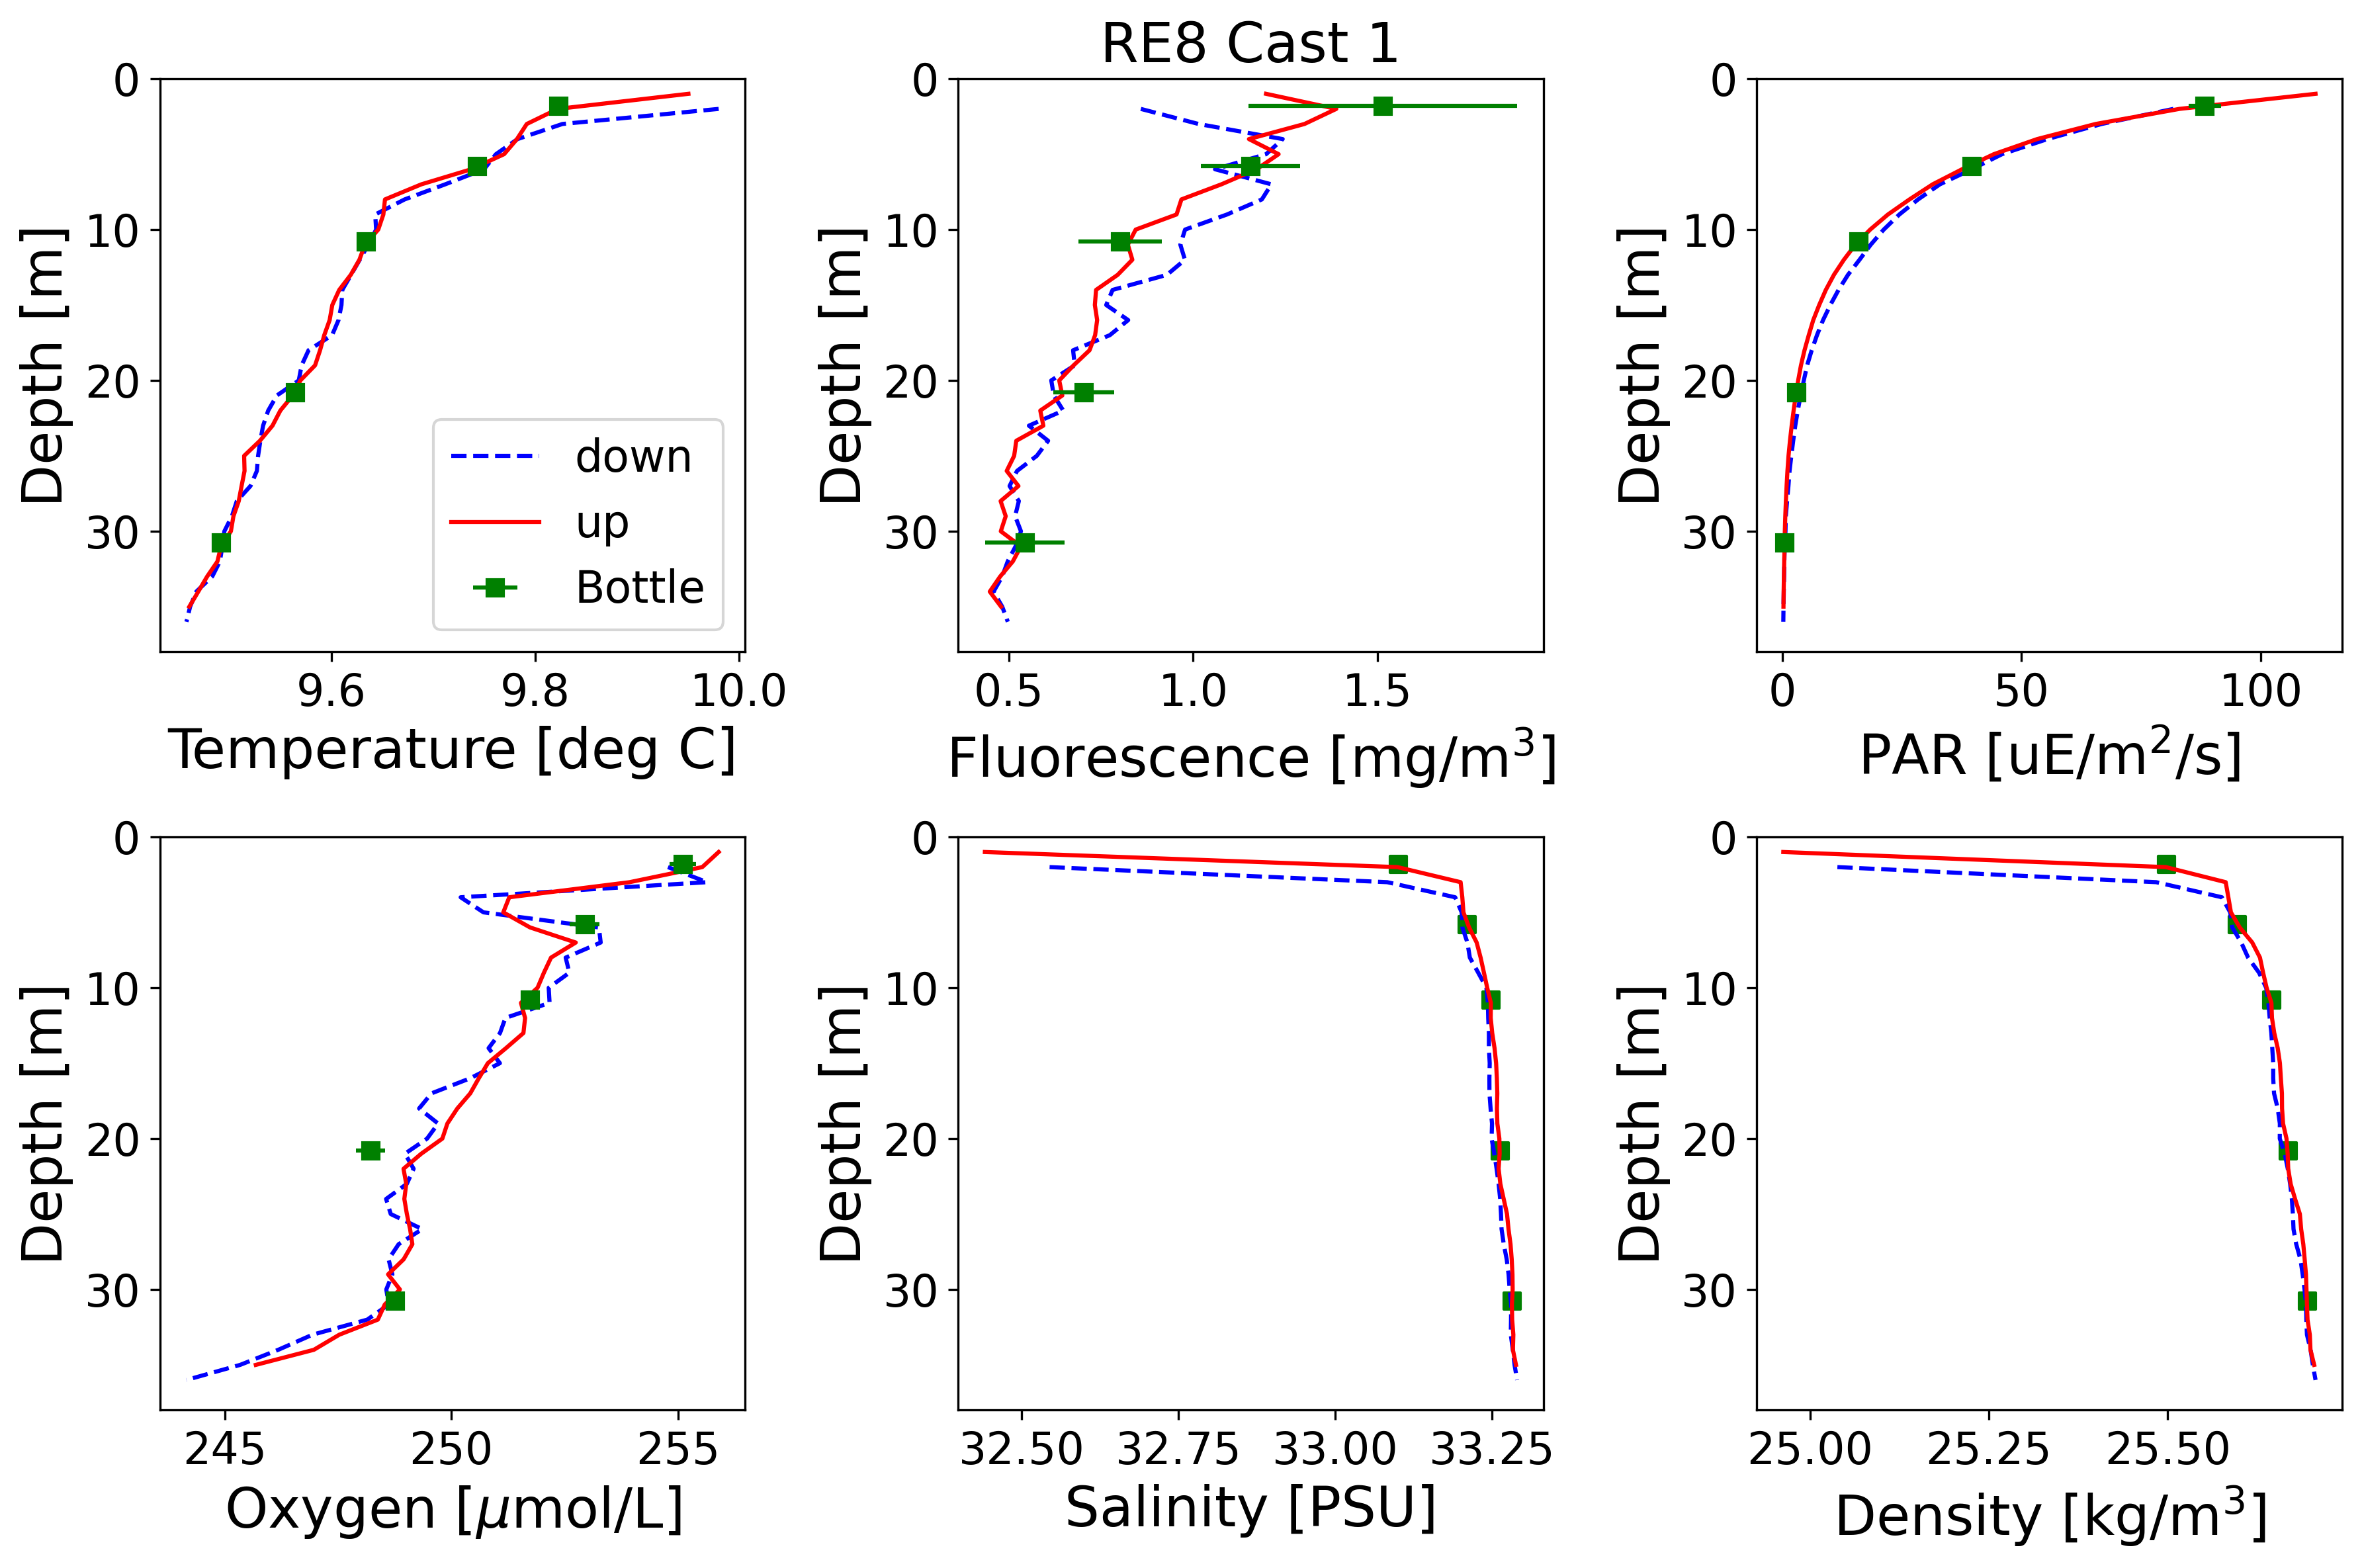

In [15]:
# plot both profile and bottle data
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8),dpi=300)

# temperature
axes[0,0].plot(data_profile[(data_profile['cast_diff']==1)]['Tv290C'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[0,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Tv290C'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[0,0].errorbar(data_bottle_average['Tv290C'],data_bottle_average['PrdM'],xerr=data_bottle_std['Tv290C'],marker='s',color='green',ls='None',label='Bottle')
axes[0,0].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel('Temperature [deg C]', fontsize = 20)
axes[0,0].set_ylabel('Depth [m]', fontsize = 20)
axes[0,0].xaxis.set_tick_params(labelsize=16)
axes[0,0].yaxis.set_tick_params(labelsize=16)
axes[0,0].legend(fontsize = 16)   

# fluorescence
axes[0,1].plot(data_profile[(data_profile['cast_diff']==1)]['WetStar'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[0,1].plot(data_profile[(data_profile['cast_diff']==-1)]['WetStar'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[0,1].errorbar(data_bottle_average['WetStar'],data_bottle_average['PrdM'],xerr=data_bottle_std['WetStar'],marker='s',color='green',ls='None',label='Bottle')
axes[0,1].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel('Fluorescence [mg/m$^3$]', fontsize = 20)
axes[0,1].set_ylabel('Depth [m]', fontsize = 20)
axes[0,1].set_title('RE8 Cast 1', fontsize = 20)
axes[0,1].xaxis.set_tick_params(labelsize=16)
axes[0,1].yaxis.set_tick_params(labelsize=16)
# axes[0,1].legend(fontsize = 16)   

# PAR
axes[0,2].plot(data_profile[(data_profile['cast_diff']==1)]['Par'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[0,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Par'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[0,2].errorbar(data_bottle_average['Par'],data_bottle_average['PrdM'],xerr=data_bottle_std['Par'],marker='s',color='green',ls='None',label='Bottle')
axes[0,2].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[0,2].invert_yaxis()
axes[0,2].set_xlabel('PAR [uE/m$^2$/s]', fontsize = 20)
axes[0,2].set_ylabel('Depth [m]', fontsize = 20)
axes[0,2].xaxis.set_tick_params(labelsize=16)
axes[0,2].yaxis.set_tick_params(labelsize=16)
# axes[0,2].legend(fontsize = 16)   

# Oxygen
axes[1,0].plot(data_profile[(data_profile['cast_diff']==1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[1,0].plot(data_profile[(data_profile['cast_diff']==-1)]['Sbeox0Mm/L'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[1,0].errorbar(data_bottle_average['Sbeox0Mm/L'],data_bottle_average['PrdM'],xerr=data_bottle_std['Sbeox0Mm/L'],marker='s',color='green',ls='None',label='Bottle')
axes[1,0].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel('Oxygen [$\mu$mol/L]', fontsize = 20)
axes[1,0].set_ylabel('Depth [m]', fontsize = 20)
axes[1,0].xaxis.set_tick_params(labelsize=16)
axes[1,0].yaxis.set_tick_params(labelsize=16)
# axes[1,0].legend(fontsize = 16)    

# Salinity
axes[1,1].plot(data_profile[(data_profile['cast_diff']==1)]['Sal00'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[1,1].plot(data_profile[(data_profile['cast_diff']==-1)]['Sal00'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[1,1].scatter(data_bottle_average['Sal00'],data_bottle_average['PrdM'],marker='s',color='green',label='Bottle')
axes[1,1].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel('Salinity [PSU]', fontsize = 20)
axes[1,1].set_ylabel('Depth [m]', fontsize = 20)
axes[1,1].xaxis.set_tick_params(labelsize=16)
axes[1,1].yaxis.set_tick_params(labelsize=16)
# axes[1,1].legend(fontsize = 16)    

# Density 
axes[1,2].plot(data_profile[(data_profile['cast_diff']==1)]['Sigma-È00'],data_profile[(data_profile['cast_diff']==1)]['PrdM'],'b--', label='down')
axes[1,2].plot(data_profile[(data_profile['cast_diff']==-1)]['Sigma-È00'],data_profile[(data_profile['cast_diff']==-1)]['PrdM'],'r-', label='up')
axes[1,2].scatter(data_bottle_average['Sigma-È00'],data_bottle_average['PrdM'],marker='s',color='green',label='Bottle')
axes[1,2].set_ylim([0,np.max(data_profile['PrdM'])+2])
axes[1,2].invert_yaxis()
axes[1,2].set_xlabel('Density [kg/m$^3$]', fontsize = 20)
axes[1,2].set_ylabel('Depth [m]', fontsize = 20)
axes[1,2].xaxis.set_tick_params(labelsize=16)
axes[1,2].yaxis.set_tick_params(labelsize=16)
# axes[1,2].legend(fontsize = 16) 

fig.tight_layout()

### Read in the Bottle data for all stations

In [16]:
# read profile data
file_name_profile_list = ['CTD_data_2024/sbe19p_5262_20240514_re5_1m.asc',
                          'CTD_data_2024/sbe19p_5262_20240514_re8_1m.asc'
                         ]

file_name_bottle_list = ['CTD_data_2024/sbe19p_5262_20240514_re5.btl',
                         'CTD_data_2024/sbe19p_5262_20240514_re8.btl',
                        ]


def read_ctd_data(file_name_profile):
    data_profile = pd.read_fwf(file_name_profile, 
                           header=None, 
                           skiprows=1, 
                           names=column_name_profile, 
                           index_col='DepSM',
                           encoding = 'ISO-8859-1',
                           parse_dates={'Time':['YYYY','MMM','DD','HH:MM:SS']}
                          )

    # the CTD file contains both upcast and downcast
    # to read/plot data individually, seperate two casts by adding a column, titled 'cast_diff'
    data_profile['cast_diff'] = data_profile['PrdM'].diff()
    data_profile['cast_diff'][0] = 1
    data_profile['cast_diff'][data_profile['cast_diff']>=1]=1.
    data_profile['cast_diff'][data_profile['cast_diff']<=-1]=-1.

    return data_profile

def read_bottle_data(file_name_bottle):
    # read bottle data
    data_bottle = pd.read_fwf(file_name_bottle, 
                          header=None, 
                          skiprows=162,
                          names=column_name_bottle,
                          encoding='latin-1')


    # select the average and std
    data_bottle_average = data_bottle[data_bottle['Note']=='(avg)'].reset_index(drop=True)
    data_bottle_std = data_bottle[data_bottle['Note']=='(sdev)'].reset_index(drop=True)

    return data_bottle_average, data_bottle_std
    

In [17]:
#load ctd
data_profile_list = []
for nn in np.arange(len(file_name_profile_list)):
    print(file_name_profile)
    data_profile = read_ctd_data(file_name_profile_list[nn])
    data_profile_list.append(data_profile)


#load bottle
print(' ')
data_bottle_avg_list, data_bottle_std_list = [], []
for file_name_bottle in file_name_bottle_list:
    print(file_name_bottle)
    data_bottle_avg, data_bottle_std = read_bottle_data(file_name_bottle)
    data_bottle_avg_list.append(data_bottle_avg)
    data_bottle_std_list.append(data_bottle_std)  


CTD_data_2024/sbe19p_5262_20240514_re8_1m.asc
CTD_data_2024/sbe19p_5262_20240514_re8_1m.asc
 
CTD_data_2024/sbe19p_5262_20240514_re5.btl
CTD_data_2024/sbe19p_5262_20240514_re8.btl


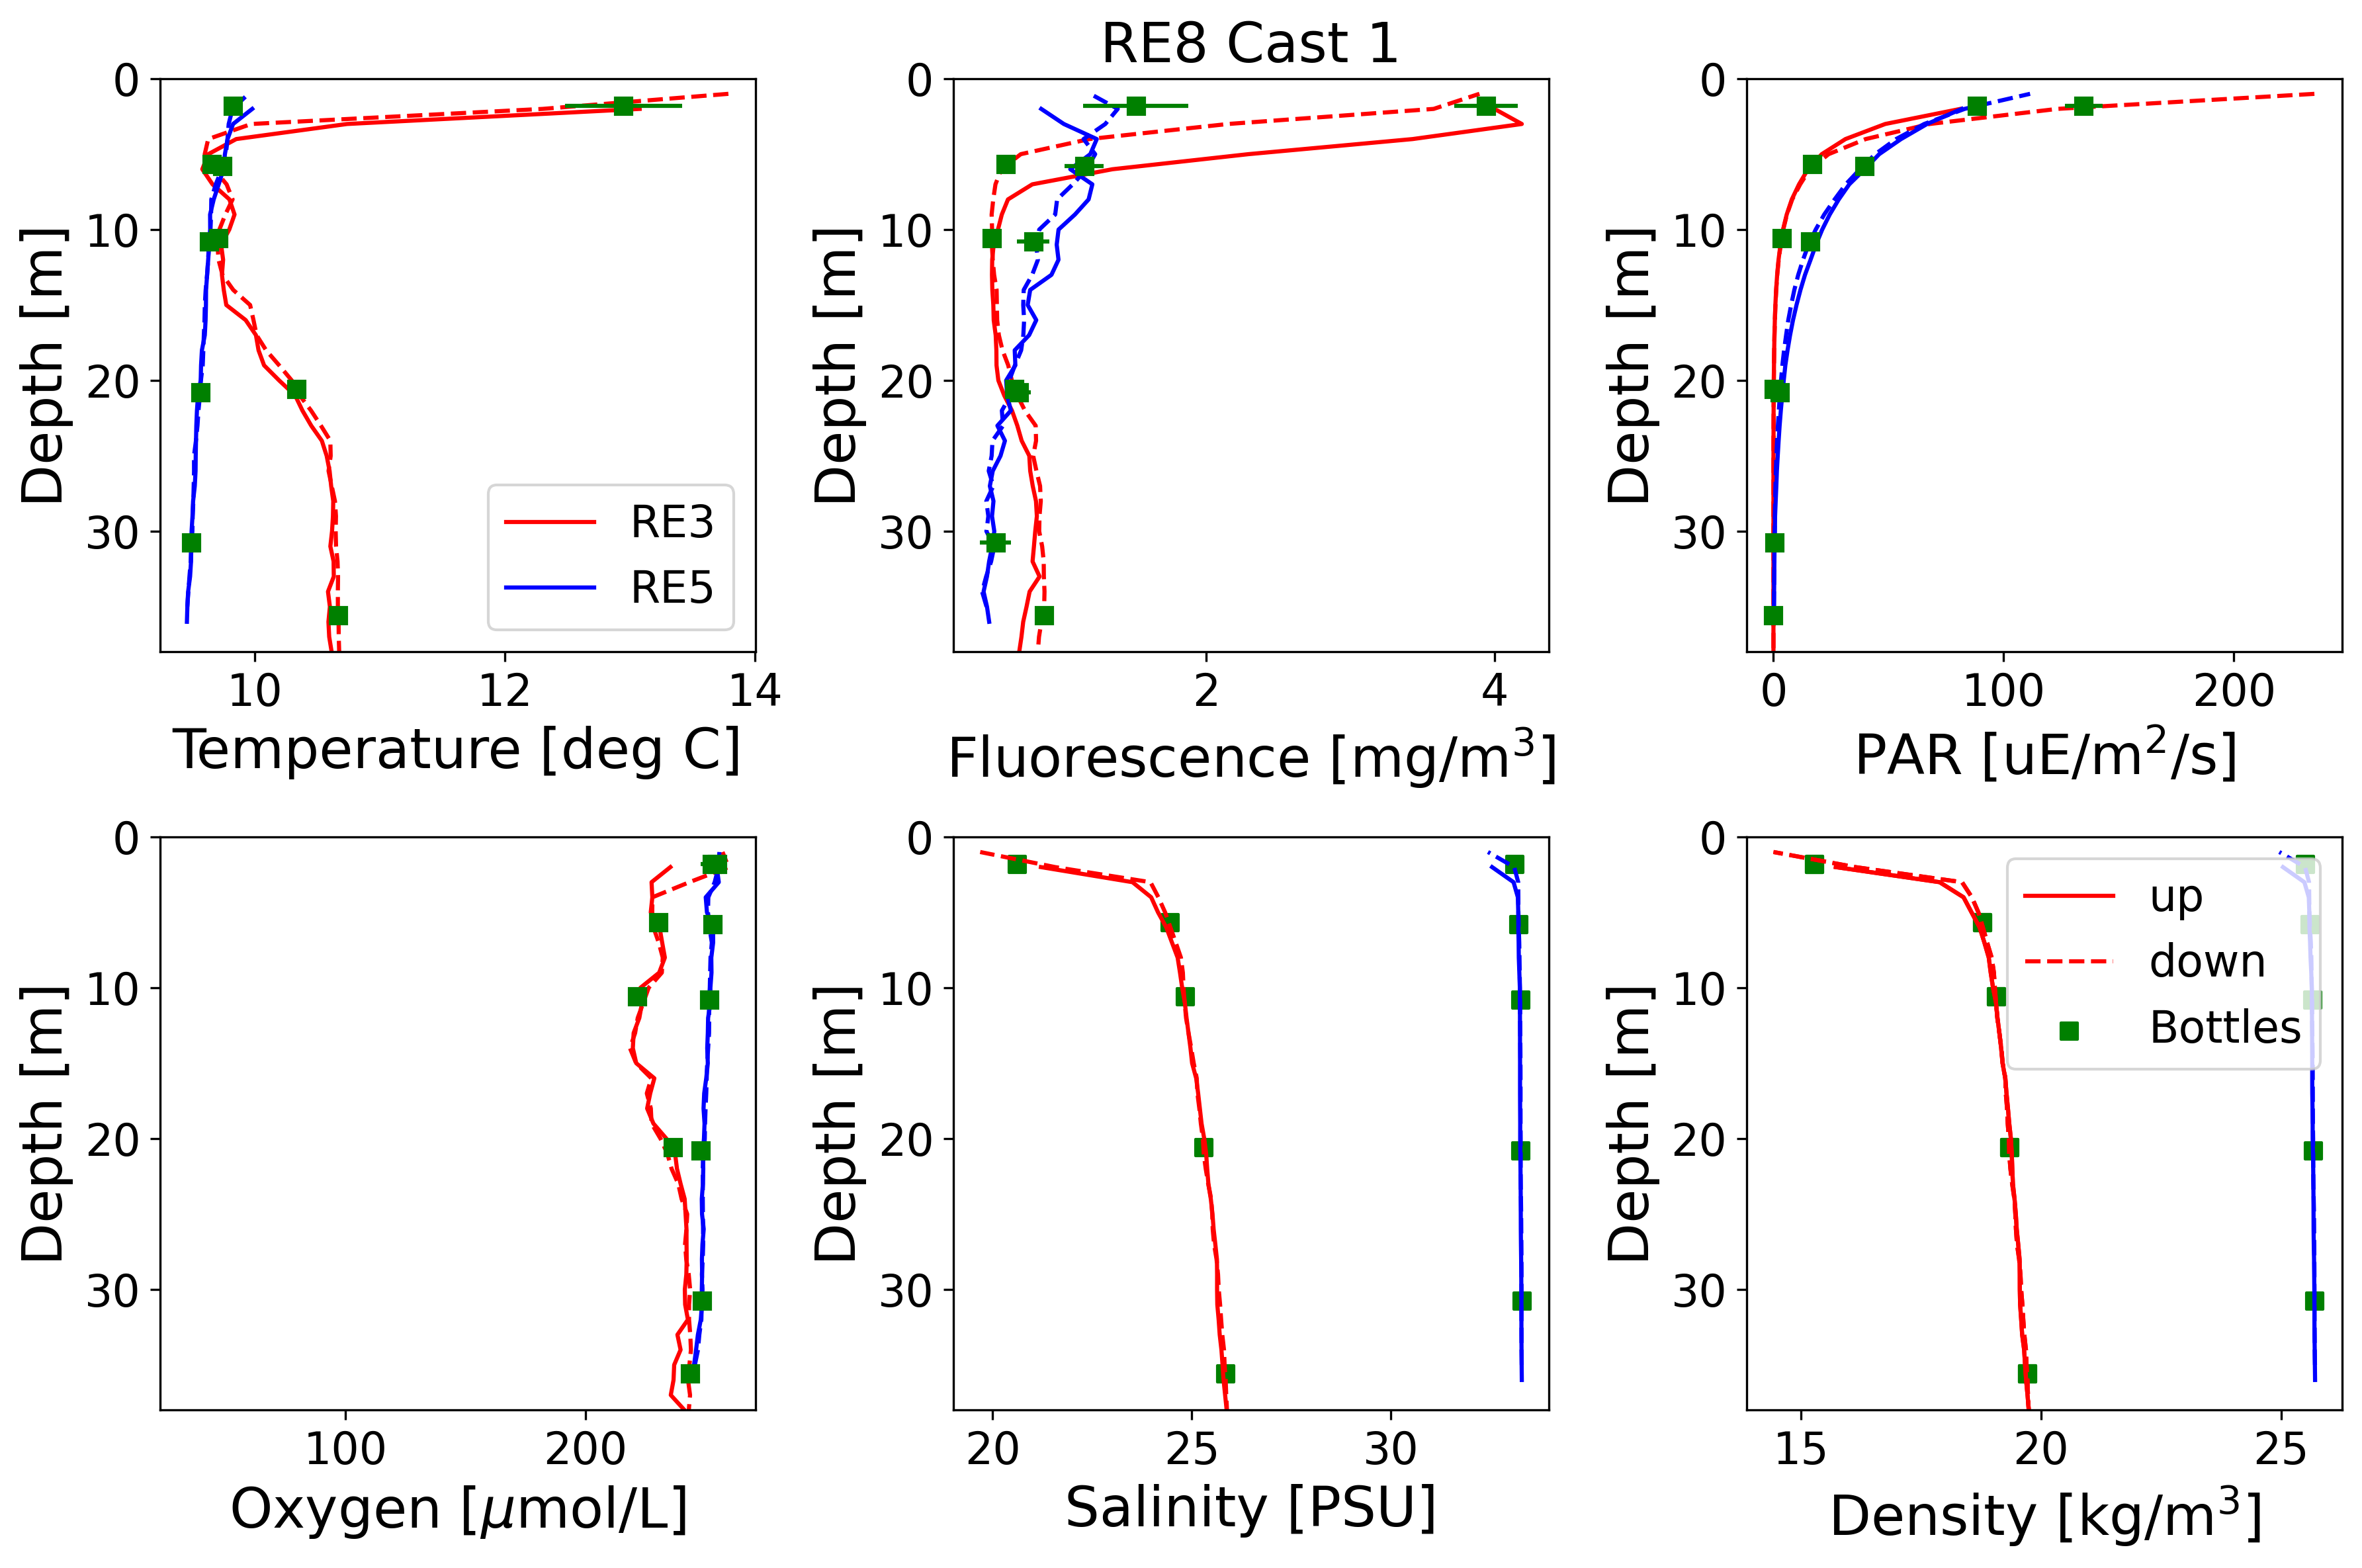

In [18]:
# plot both profile and bottle data
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8),dpi=300)

linestyle_list_up = ['r-','b-','g-','m-','c-']
linestyle_list_do = ['r--','b--','g--','m--','c--']
label_list = ['RE3','RE5','RE8','RE7','RE9']

for nn in np.arange(len(data_profile_list)):

    # temperature
    axes[0,0].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['Tv290C'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['PrdM'],linestyle_list_up[nn], label=label_list[nn])
    axes[0,0].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['Tv290C'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['PrdM'],linestyle_list_do[nn])
    if nn in [0,1,2]:
       axes[0,0].errorbar(data_bottle_avg_list[nn]['Tv290C'],data_bottle_avg_list[nn]['PrdM'],xerr=data_bottle_std_list[nn]['Tv290C'],marker='s',color='green',ls='None')
    
    axes[0,0].set_ylim([0,np.max(data_profile_list[nn]['PrdM'])+2])
    axes[0,0].invert_yaxis()
    axes[0,0].set_xlabel('Temperature [deg C]', fontsize = 20)
    axes[0,0].set_ylabel('Depth [m]', fontsize = 20)
    axes[0,0].xaxis.set_tick_params(labelsize=16)
    axes[0,0].yaxis.set_tick_params(labelsize=16)
    axes[0,0].legend(fontsize = 16)   

    # fluorescence
    axes[0,1].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['WetStar'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['PrdM'],linestyle_list_up[nn])
    axes[0,1].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['WetStar'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['PrdM'],linestyle_list_do[nn])
    if nn in [0,1,2]:
       axes[0,1].errorbar(data_bottle_avg_list[nn]['WetStar'],data_bottle_avg_list[nn]['PrdM'],xerr=data_bottle_std_list[nn]['WetStar'],marker='s',color='green',ls='None')
    axes[0,1].set_ylim([0,np.max(data_profile_list[nn]['PrdM'])+2])
    axes[0,1].invert_yaxis()
    axes[0,1].set_xlabel('Fluorescence [mg/m$^3$]', fontsize = 20)
    axes[0,1].set_ylabel('Depth [m]', fontsize = 20)
    axes[0,1].set_title('RE8 Cast 1', fontsize = 20)
    axes[0,1].xaxis.set_tick_params(labelsize=16)
    axes[0,1].yaxis.set_tick_params(labelsize=16)
    # axes[0,1].legend(fontsize = 16)   

    # PAR
    axes[0,2].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['Par'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['PrdM'],linestyle_list_up[nn])
    axes[0,2].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['Par'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['PrdM'],linestyle_list_do[nn])
    if nn in [0,1,2]:
       axes[0,2].errorbar(data_bottle_avg_list[nn]['Par'],data_bottle_avg_list[nn]['PrdM'],xerr=data_bottle_std_list[nn]['Par'],marker='s',color='green',ls='None')
    axes[0,2].set_ylim([0,np.max(data_profile_list[nn]['PrdM'])+2])
    axes[0,2].invert_yaxis()
    axes[0,2].set_xlabel('PAR [uE/m$^2$/s]', fontsize = 20)
    axes[0,2].set_ylabel('Depth [m]', fontsize = 20)
    axes[0,2].xaxis.set_tick_params(labelsize=16)
    axes[0,2].yaxis.set_tick_params(labelsize=16)
    # axes[0,2].legend(fontsize = 16)   

    # Oxygen
    axes[1,0].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['Sbeox0Mm/L'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['PrdM'],linestyle_list_up[nn])
    axes[1,0].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['Sbeox0Mm/L'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['PrdM'],linestyle_list_do[nn])
    if nn in [0,1,2]:
       axes[1,0].errorbar(data_bottle_avg_list[nn]['Sbeox0Mm/L'],data_bottle_avg_list[nn]['PrdM'],xerr=data_bottle_std_list[nn]['Sbeox0Mm/L'],marker='s',color='green',ls='None')
    axes[1,0].set_ylim([0,np.max(data_profile_list[nn]['PrdM'])+2])
    axes[1,0].invert_yaxis()
    axes[1,0].set_xlabel('Oxygen [$\mu$mol/L]', fontsize = 20)
    axes[1,0].set_ylabel('Depth [m]', fontsize = 20)
    axes[1,0].xaxis.set_tick_params(labelsize=16)
    axes[1,0].yaxis.set_tick_params(labelsize=16)
    # axes[1,0].legend(fontsize = 16)    

    # Salinity
    axes[1,1].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['Sal00'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['PrdM'],linestyle_list_up[nn])
    axes[1,1].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['Sal00'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['PrdM'],linestyle_list_do[nn])
    if nn in [0,1,2]:
       axes[1,1].scatter(data_bottle_avg_list[nn]['Sal00'],data_bottle_avg_list[nn]['PrdM'],marker='s',color='green')
    axes[1,1].set_ylim([0,np.max(data_profile_list[nn]['PrdM'])+2])
    axes[1,1].invert_yaxis()
    axes[1,1].set_xlabel('Salinity [PSU]', fontsize = 20)
    axes[1,1].set_ylabel('Depth [m]', fontsize = 20)
    axes[1,1].xaxis.set_tick_params(labelsize=16)
    axes[1,1].yaxis.set_tick_params(labelsize=16)
    # axes[1,1].legend(fontsize = 16)    

    # Density 
    axes[1,2].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['Sigma-È00'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==1)]['PrdM'],linestyle_list_up[nn])
    axes[1,2].plot(data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['Sigma-È00'],data_profile_list[nn][(data_profile_list[nn]['cast_diff']==-1)]['PrdM'],linestyle_list_do[nn])
    if nn in [0,1,2]:
       axes[1,2].scatter(data_bottle_avg_list[nn]['Sigma-È00'],data_bottle_avg_list[nn]['PrdM'],marker='s',color='green')
    axes[1,2].set_ylim([0,np.max(data_profile_list[nn]['PrdM'])+2])
    axes[1,2].invert_yaxis()
    axes[1,2].set_xlabel('Density [kg/m$^3$]', fontsize = 20)
    axes[1,2].set_ylabel('Depth [m]', fontsize = 20)
    axes[1,2].xaxis.set_tick_params(labelsize=16)
    axes[1,2].yaxis.set_tick_params(labelsize=16)
    # axes[1,2].legend(fontsize = 16) 


axes[1,2].plot(data_profile_list[0][(data_profile_list[0]['cast_diff']==1)]['Sigma-È00'],data_profile_list[0][(data_profile_list[0]['cast_diff']==1)]['PrdM'],linestyle_list_up[0],label='up')
axes[1,2].plot(data_profile_list[0][(data_profile_list[0]['cast_diff']==-1)]['Sigma-È00'],data_profile_list[0][(data_profile_list[0]['cast_diff']==-1)]['PrdM'],linestyle_list_do[0],label='down')
axes[1,2].scatter(data_bottle_avg_list[0]['Sigma-È00'],data_bottle_avg_list[0]['PrdM'],marker='s',color='green',label='Bottles')
axes[1,2].legend(fontsize = 16)    

fig.tight_layout()





In [19]:
#plot bathymetry and stations locations

In [20]:
'''
from netCDF4 import Dataset

savedir = '/Users/jenmilsom/Desktop/Teaching_Exeter/GEO3463_Research_Cruise/2024_2025/'
loadname = 'GEBCO_2024_sub_ice_topo.nc'

nc = Dataset(savedir + loadname, 'r')
#print(nc.variables)
topo = nc.variables['elevation'][:]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
nc.close()

print(topo.shape, topo.min(), topo.max())
print(lon.shape, lon.min(), lon.max())
print(lat.shape, lat.min(), lat.max())
'''

"\nfrom netCDF4 import Dataset\n\nsavedir = '/Users/jenmilsom/Desktop/Teaching_Exeter/GEO3463_Research_Cruise/2024_2025/'\nloadname = 'GEBCO_2024_sub_ice_topo.nc'\n\nnc = Dataset(savedir + loadname, 'r')\n#print(nc.variables)\ntopo = nc.variables['elevation'][:]\nlat = nc.variables['lat'][:]\nlon = nc.variables['lon'][:]\nnc.close()\n\nprint(topo.shape, topo.min(), topo.max())\nprint(lon.shape, lon.min(), lon.max())\nprint(lat.shape, lat.min(), lat.max())\n"

In [21]:
'''
lonmin, lonmax, latmin, latmax = -7,-4,56,57

ind_lonmin = np.argmin(np.abs(lon - lonmin))
ind_lonmax = np.argmin(np.abs(lon - lonmax))
ind_latmin = np.argmin(np.abs(lat - latmin))
ind_latmax = np.argmin(np.abs(lat - latmax))

print(ind_lonmin, lon[ind_lonmin], lonmin)
print(ind_lonmax, lon[ind_lonmax], lonmax)
print(ind_latmin, lat[ind_latmin], latmin)
print(ind_latmax, lat[ind_latmax], latmax)

topo = np.copy(topo[ind_latmin:ind_latmax+1, ind_lonmin: ind_lonmax+1])
print(topo.shape, topo.min(), topo.max())
lon = np.copy(lon[ ind_lonmin: ind_lonmax+1])
lat = np.copy(lat[ind_latmin:ind_latmax+1])
print(lon.shape, lon.min(), lon.max())
print(lat.shape, lat.min(), lat.max())
np.save(savedir + 'topo_Lock_Etive',(topo, lon[None,:], lat[:,None]))
'''

savedir = '/Users/jenmilsom/Desktop/Teaching_Exeter/GEO3463_Research_Cruise/2024_2025/'
(topo, lon, lat) = np.load(savedir + 'topo_Lock_Etive.npy',allow_pickle=True)

lon, lat = lon[0,:], lat[:,0]
print(topo.shape, lon.shape, lat.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jenmilsom/Desktop/Teaching_Exeter/GEO3463_Research_Cruise/2024_2025/topo_Lock_Etive.npy'

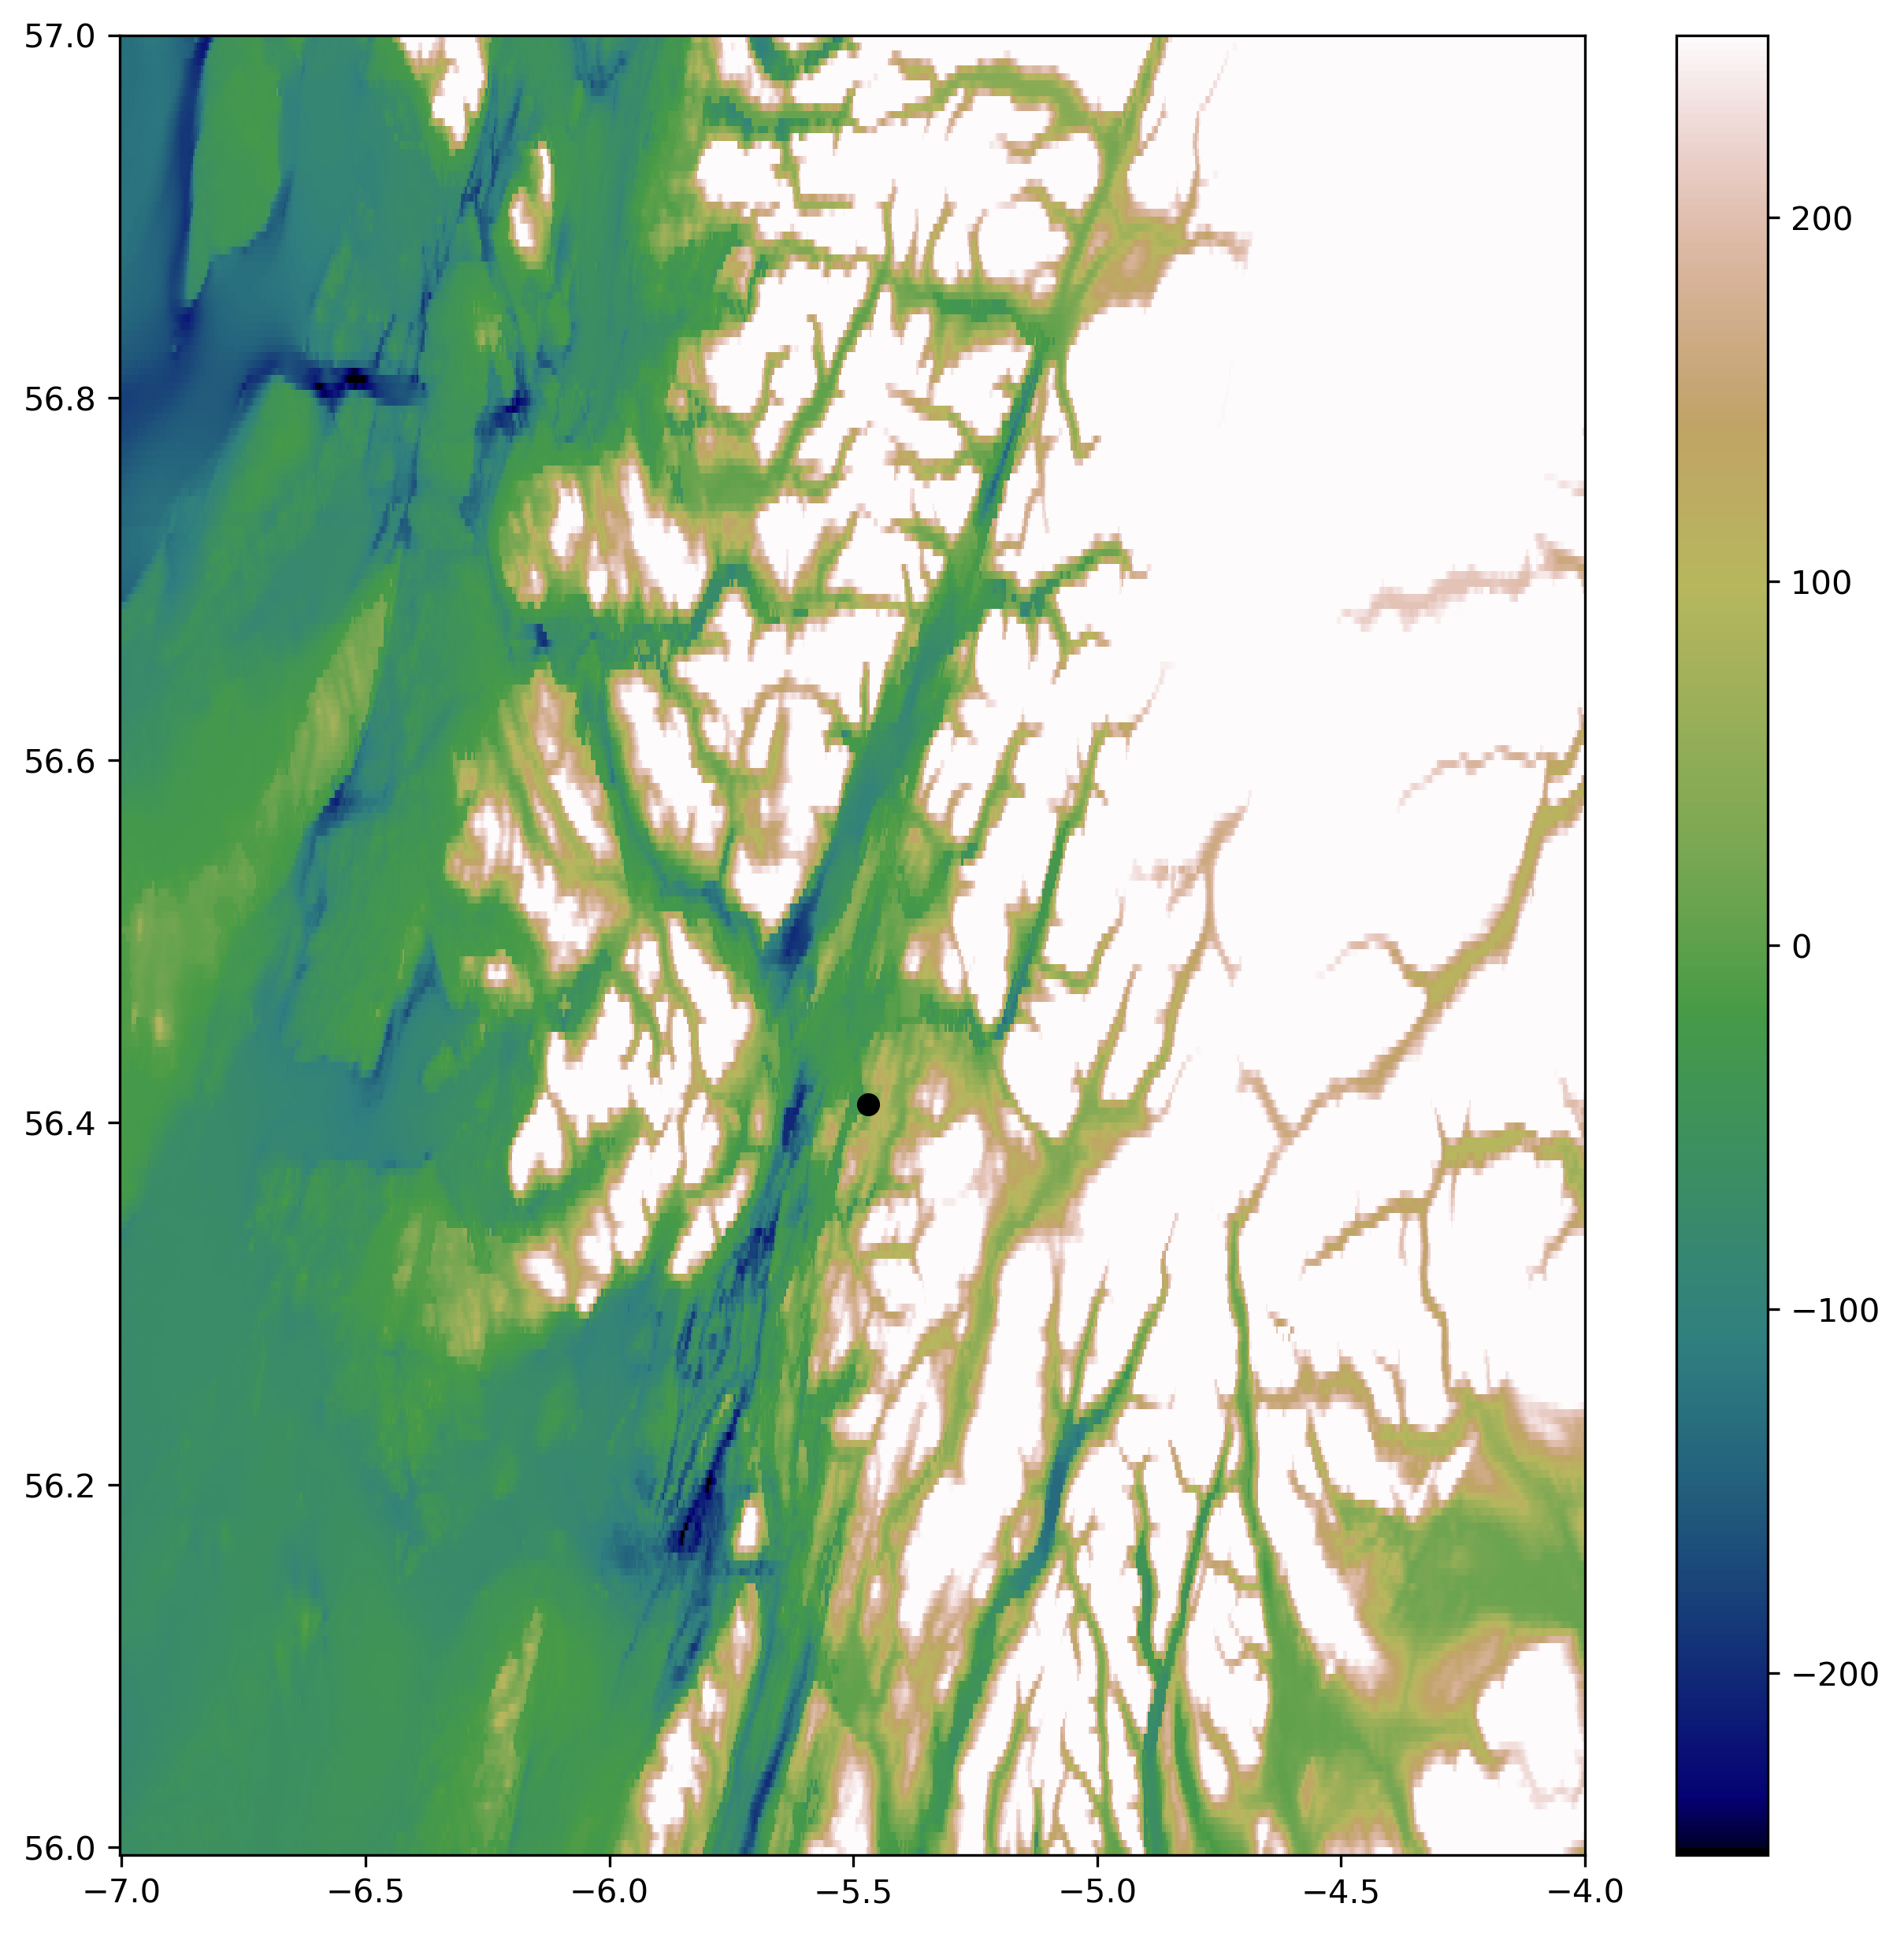

In [11]:
lon_oban, lat_oban = -5.47, 56.41
vmin, vmax = -250,250

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)

plt.pcolormesh(lon, lat, topo, cmap = plt.cm.gist_earth, vmin=vmin, vmax=vmax)
plt.plot(lon_oban,lat_oban, 'o',color='k',linewidth=15)
#plt.xlim([lonmin,lonmax])
#plt.ylim([latmin,latmax])
plt.colorbar()

plt.show()
plt.clf()
plt.cla()
plt.close()




In [200]:
np.save(savedir + 'topo_Lock_Etive',(topo, lon[None,:], lat[:,None]))